In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
size = 100

In [119]:
f = np.random.multivariate_normal(np.zeros(size), cov=np.identity(size), size=1)
f.shape

(1, 100)

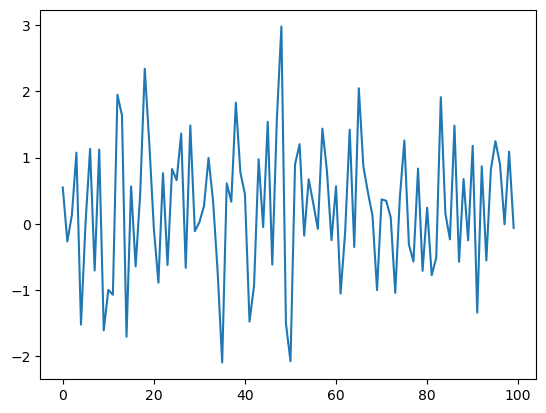

In [120]:
plt.plot(f.T)

In [121]:
x = np.linspace(0,1,size)
cov = np.zeros((size,size))
l = 0.2
for i in range(size):
    for j in range(size):
        cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))

In [122]:
f = np.random.multivariate_normal(np.zeros(size), cov=cov, size=1)

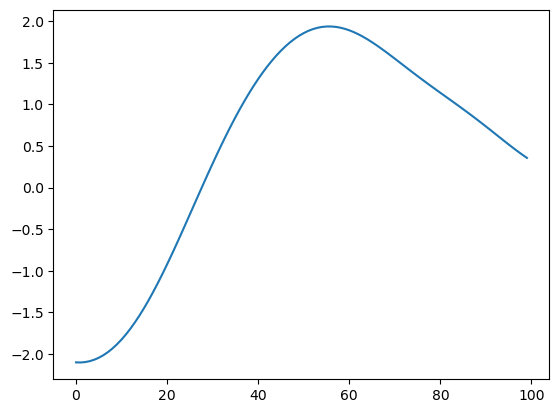

In [123]:
plt.plot(f.T)